In [11]:
import pandas as pd
data=pd.read_csv("data/Medium_Theater_estimate.csv")

In [4]:
ex=data[data['공연시설코드']=='FC222007']

In [5]:
ex

,공연시설코드,년도_월,년도_월_일,좌석수,예매/취소금액,예매/취소구분
0,FC222007,201908,20190817,516,2058000,141
1,FC222007,201908,20190818,516,1428000,98
2,FC222007,201910,20191005,516,80000,8
3,FC222007,201911,20191116,516,795000,32
4,FC222007,201911,20191117,516,174000,7
5,FC222007,201911,20191118,516,635000,15
6,FC222007,201911,20191119,516,72000,3
7,FC222007,201911,20191120,516,246000,9
8,FC222007,201911,20191121,516,99000,4
9,FC222007,201911,20191122,516,627000,25


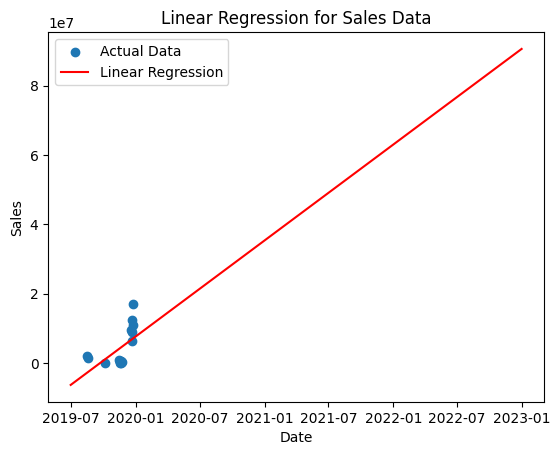

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dates = ex['년도_월_일']
sales = ex['예매/취소금액']

# 날짜를 날짜 형식으로 변환
dates = pd.to_datetime(dates, format='%Y%m%d')

# 데이터프레임 생성
df = pd.DataFrame({'date': dates, 'sales': sales})

# 선형 회귀 모델 생성
X = df['date'].values.astype(np.int64)[:, np.newaxis]  # 날짜를 정수로 변환하여 입력 데이터로 사용
y = df['sales'].values
model = LinearRegression()
model.fit(X, y)

# 선형 회귀 결과 시각화
plt.scatter(dates, sales, label='Actual Data')
all_dates = pd.date_range(start='2019-07-01', end='2022-12-31', freq='d')
all_dates_array=pd.to_datetime(all_dates, format='%Y%m%d')
a=all_dates_array.values.astype(np.int64)[:, np.newaxis]
plt.plot(all_dates, model.predict(a), color='red', label='Linear Regression')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Linear Regression for Sales Data')
plt.legend()
plt.show()

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [13]:
# 월별 매출 예측을 위해 날짜를 월로 변환
#data['년도_월_일'] = pd.to_datetime(data['년도_월_일'], format='%Y%m%d')
# 모든 극장의 예측매출을 저장할 데이터프레임 생성
theaters = data['공연시설코드'].unique()
theater_prediction = pd.DataFrame({'month': pd.period_range(start='2020-04', end='2022-12', freq='M')})
# 월별 예측매출 계산 및 저장
for theater in theaters:
    theater_data = data[data['공연시설코드'] == theater]   
    if theater_data.shape[0] == 1:
        single_sales = theater_data['예매/취소금액'].values[0]
        one_predicted_sales = np.repeat(single_sales, 33)
        theater_prediction[theater]=one_predicted_sales
    else:
        X = theater_data['년도_월'].values.astype(np.int64)[:, np.newaxis]  # 날짜를 정수로 변환하여 입력 데이터로 사용
        y = theater_data['예매/취소금액'].values
        
        model = LinearRegression()
        model.fit(X, y)
        
        # 해당 월의 평균 일별 매출 예측
        all_dates = pd.date_range(start='2020-04-01', end='2022-12-31', freq='M')
        all_dates_array=pd.to_datetime(all_dates, format='%Y%m')
        a=all_dates_array.values.astype(np.int64)[:, np.newaxis]

        predicted_sales = model.predict(a)
        

        theater_prediction[theater]=predicted_sales
        
    
    

# 결과 데이터프레임 출력
print(theater_prediction)

      month      FC222007  FC222040      FC222048      FC222049      FC222054   
0   2020-04  3.747576e+24   4000000  3.122455e+24  6.177235e+22  6.845399e+21  \
1   2020-05  3.753896e+24   4000000  3.127721e+24  6.187653e+22  6.856943e+21   
2   2020-06  3.760012e+24   4000000  3.132817e+24  6.197734e+22  6.868115e+21   
3   2020-07  3.766332e+24   4000000  3.138083e+24  6.208152e+22  6.879659e+21   
4   2020-08  3.772652e+24   4000000  3.143349e+24  6.218569e+22  6.891203e+21   
5   2020-09  3.778769e+24   4000000  3.148445e+24  6.228651e+22  6.902375e+21   
6   2020-10  3.785089e+24   4000000  3.153710e+24  6.239068e+22  6.913920e+21   
7   2020-11  3.791205e+24   4000000  3.158806e+24  6.249150e+22  6.925091e+21   
8   2020-12  3.797525e+24   4000000  3.164072e+24  6.259567e+22  6.936636e+21   
9   2021-01  3.803845e+24   4000000  3.169338e+24  6.269984e+22  6.948180e+21   
10  2021-02  3.809553e+24   4000000  3.174094e+24  6.279394e+22  6.958607e+21   
11  2021-03  3.815873e+24   

C:\Users\ohke7\AppData\Local\Temp\ipykernel_9444\211137347.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  theater_prediction[theater]=predicted_sales
C:\Users\ohke7\AppData\Local\Temp\ipykernel_9444\211137347.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  theater_prediction[theater]=predicted_sales
C:\Users\ohke7\AppData\Local\Temp\ipykernel_9444\211137347.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

In [ ]:
theater_prediction


,month,FC222007,FC222040,FC222048,FC222049,FC222054,FC222058,FC222061,FC222076,FC222080,...,FC223835,FC223889,FC223890,FC223897,FC223909,FC223941,FC224381,FC224454,FC224486,FC224496
0,2020-04,3.747576e+24,4000000,3.122455e+24,6.177235e+22,6.845399e+21,-1.381090e+22,-9.381098e+22,7.265175e+23,-2.550471e+24,...,-2.740282e+22,-1.260551e+25,1.068150e+21,6.090855e+24,-1.468074e+23,-8.105240e+22,1404000,3.328877e+24,6666.666667,5170000
1,2020-05,3.753896e+24,4000000,3.127721e+24,6.187653e+22,6.856943e+21,-1.383419e+22,-9.396919e+22,7.277427e+23,-2.554772e+24,...,-2.744903e+22,-1.262676e+25,1.069951e+21,6.101126e+24,-1.470550e+23,-8.118909e+22,1404000,3.334491e+24,6666.666667,5170000
2,2020-06,3.760012e+24,4000000,3.132817e+24,6.197734e+22,6.868115e+21,-1.385673e+22,-9.412229e+22,7.289284e+23,-2.558934e+24,...,-2.749375e+22,-1.264734e+25,1.071695e+21,6.111067e+24,-1.472946e+23,-8.132137e+22,1404000,3.339924e+24,6666.666667,5170000
3,2020-07,3.766332e+24,4000000,3.138083e+24,6.208152e+22,6.879659e+21,-1.388002e+22,-9.428050e+22,7.301536e+23,-2.563236e+24,...,-2.753996e+22,-1.266860e+25,1.073496e+21,6.121339e+24,-1.475422e+23,-8.145806e+22,1404000,3.345538e+24,6666.666667,5170000
4,2020-08,3.772652e+24,4000000,3.143349e+24,6.218569e+22,6.891203e+21,-1.390331e+22,-9.443870e+22,7.313788e+23,-2.567537e+24,...,-2.758618e+22,-1.268985e+25,1.075297e+21,6.131610e+24,-1.477897e+23,-8.159475e+22,1404000,3.351152e+24,6666.666667,5170000
5,2020-09,3.778769e+24,4000000,3.148445e+24,6.228651e+22,6.902375e+21,-1.392585e+22,-9.459180e+22,7.325645e+23,-2.571699e+24,...,-2.763090e+22,-1.271043e+25,1.077041e+21,6.141551e+24,-1.480293e+23,-8.172703e+22,1404000,3.356585e+24,6666.666667,5170000
6,2020-10,3.785089e+24,4000000,3.153710e+24,6.239068e+22,6.913920e+21,-1.394914e+22,-9.475001e+22,7.337898e+23,-2.576000e+24,...,-2.767711e+22,-1.273168e+25,1.078842e+21,6.151823e+24,-1.482769e+23,-8.186372e+22,1404000,3.362199e+24,6666.666667,5170000
7,2020-11,3.791205e+24,4000000,3.158806e+24,6.249150e+22,6.925091e+21,-1.397168e+22,-9.490311e+22,7.349755e+23,-2.580163e+24,...,-2.772183e+22,-1.275226e+25,1.080585e+21,6.161763e+24,-1.485165e+23,-8.199600e+22,1404000,3.367631e+24,6666.666667,5170000
8,2020-12,3.797525e+24,4000000,3.164072e+24,6.259567e+22,6.936636e+21,-1.399497e+22,-9.506132e+22,7.362007e+23,-2.584464e+24,...,-2.776805e+22,-1.277352e+25,1.082387e+21,6.172035e+24,-1.487641e+23,-8.213268e+22,1404000,3.373245e+24,6666.666667,5170000
9,2021-01,3.803845e+24,4000000,3.169338e+24,6.269984e+22,6.948180e+21,-1.401826e+22,-9.521952e+22,7.374259e+23,-2.588765e+24,...,-2.781426e+22,-1.279477e+25,1.084188e+21,6.182307e+24,-1.490117e+23,-8.226937e+22,1404000,3.378859e+24,6666.666667,5170000


In [53]:
# theater_prediction.to_csv("중극장예측_regression.csv", index=False)